## CLUSTERING CUSTOMER INTO TWO STATUS.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
# Reading dataset.
df = pd.read_csv('customer-churn-processed.csv')
df.head()

,Gender,Age,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Online Security,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Internet Type__0,Internet Type__1,Internet Type__2,Internet Type__9,Contract__0,Contract__1,Contract__2,Payment Method__0,Payment Method__1,Payment Method__2
0,0,1,10.423196,1,0,1,0,0,1,1,0,0,1,65.6,0.00,0.0,381.51,974.81,0,1,0,0,0,0,1,0,0,1,0
1,1,1,22.475708,1,1,1,0,0,0,0,1,1,0,-4.0,38.33,10.0,96.21,610.28,0,1,0,0,0,1,0,0,0,1,0
2,1,1,4.000000,1,0,1,0,1,0,0,0,0,1,73.9,0.00,0.0,134.60,415.45,1,0,0,1,0,1,0,0,1,0,0
3,1,2,13.000000,1,0,1,0,1,0,1,1,0,1,98.0,0.00,0.0,361.66,1599.51,1,0,0,1,0,1,0,0,1,0,0
4,0,2,3.000000,1,0,1,0,0,1,1,0,0,1,83.9,0.00,0.0,22.14,289.54,1,0,0,1,0,1,0,0,0,1,0


In [18]:
x = df.drop('Customer Status', axis=1)
status = df['Customer Status']

### KMEANS clustering.

In [19]:
# pca = PCA(n_components=3, random_state=23, svd_solver='arpack').fit(xs)
# pca.explained_variance_

In [29]:
model = KMeans(n_clusters=2, random_state=23, n_init=1000, )
xs = x[['Contract__0', 'Tenure in Months', 'Monthly Charge', 'Total Revenue',]]

pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('pca', PCA(n_components=3, random_state=23, svd_solver='arpack')),
                        ('kmeans', model)])
pipe.fit(xs)

labels = pipe['kmeans'].labels_


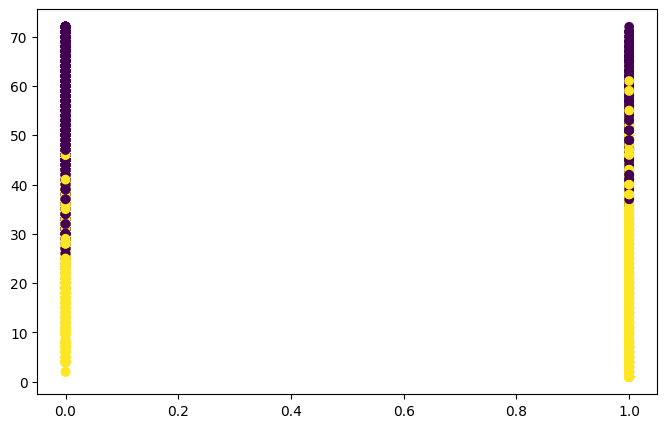

In [30]:
#samples = pipe['pca'].transform(xs)

plt.figure(figsize=(8,5))
plt.scatter(xs.iloc[:,0], xs.iloc[:,1], c=labels)
plt.show()


In [31]:
label_df = pd.DataFrame({'labels': labels, 'status':status})
ct = pd.crosstab(index=label_df['labels'], columns=label_df['status'])
print(ct)

status     0     1
labels            
0       2558   318
1       2162  1551


### HEIRACHICAL Clusterng.

In [36]:
transformed_x = StandardScaler()
transformed_x.fit(xs)
x_trans = pd.DataFrame(transformed_x.transform(xs), columns = xs.columns)

In [37]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

In [46]:
plt.figure(figsize=(10,5))

mergins = linkage(x_trans, method='centroid')
# dendrogram(mergins, labels=status, leaf_rotation=90, leaf_font_size=8, truncate_mode='lastp', p=50)
# plt.show()

<Figure size 1000x500 with 0 Axes>

In [53]:
#labelz = fcluster(mergins, t=2, criterion='maxclust')

aggl = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
labelz = aggl.fit_predict(x)

trt = pd.DataFrame({'labels':labelz, 'status':status, 'Truth': status == labelz})

ct = pd.crosstab(index=trt['labels'], columns=trt['status'])
print(ct)


status     0     1
labels            
0       2035   375
1       2685  1494


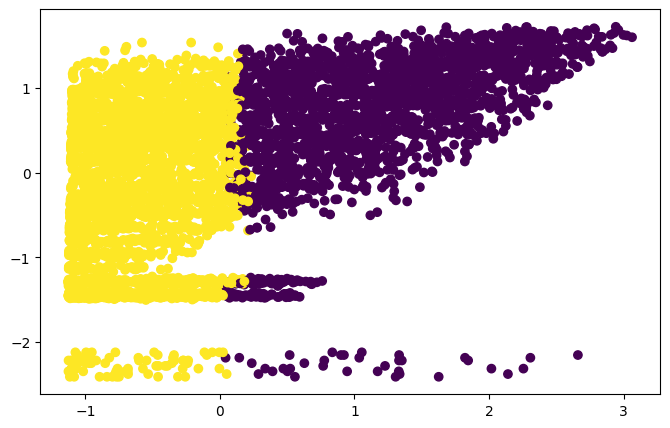

In [54]:
plt.figure(figsize=(8,5))
plt.scatter(x_trans.loc[:,'Total Revenue'], x_trans.loc[:,'Monthly Charge'], c=labelz)
plt.show()